# Проект. Исследование стартапов
Автор: Владимиров Николай Александрович

Дата: 07.11.2025

## Введение

Инвестиционная компания обратилась с задачей анализа данных финансирования молодых проектов для дальнейшей оценки перспективности выхода на рынок стартапов.

**Цели**:
 - Подготовить данные к работе
 - Исследовать динамику и стрктуру финансирования стартапов
 - Сделать выводы для оценки инвестиционных стратегий

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

Файлы находятся в папке `datasets`, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)

In [3]:
temp = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [4]:
a = df.isna().all(axis=1).sum()
print(a)

4856


In [5]:
b = a / len(temp) * 100
print(b)

8.943898036615463


В `cb_investments.csv` 54293 строчки, из них заполнено 49438 строчек. Полностью пустых строчек - 4856 или 8.94%, можно удалить их.

In [6]:
df = df.dropna(how='all')

In [7]:
display(df.isna().sum())

name                        1
homepage_url             3449
category_list            3961
 market                  3961
 funding_total_usd          0
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
participants            18965
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10884
first_funding_at            0
mid_funding_at          19150
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B   

In [8]:
temp_1 = df.copy()

In [9]:
display((df.isna().sum()/len(df)*100).round(3))

name                     0.002
homepage_url             6.976
category_list            8.012
 market                  8.012
 funding_total_usd       0.000
status                   2.658
country_code            10.666
state_code              38.992
region                  10.666
city                    12.371
funding_rounds           0.000
participants            38.361
founded_at              22.015
founded_month           22.161
founded_quarter         22.161
founded_year            22.015
first_funding_at         0.000
mid_funding_at          38.735
last_funding_at          0.000
seed                     0.000
venture                  0.000
equity_crowdfunding      0.000
undisclosed              0.000
convertible_note         0.000
debt_financing           0.000
angel                    0.000
grant                    0.000
private_equity           0.000
post_ipo_equity          0.000
post_ipo_debt            0.000
secondary_market         0.000
product_crowdfunding     0.000
round_A 

In [10]:
display(df[df['name'].isna()])

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
27212,NaN,http://tellitin10.com,|Startups|,Startups,"25,000",closed,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
display(df.head())

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
display(df[['founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 
            'mid_funding_at', 'last_funding_at']])

,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at
0,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06
1,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15
2,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02
3,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03
4,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14
...,...,...,...,...,...,...,...
49433,NaN,NaN,NaN,NaN,2014-12-01,NaN,2014-12-01
49434,NaN,NaN,NaN,NaN,2014-12-01,NaN,2014-12-01
49435,NaN,NaN,NaN,NaN,2014-12-02,NaN,2014-12-02
49436,NaN,NaN,NaN,NaN,2014-12-02,NaN,2014-12-02


In [13]:
df_2 = pd.read_csv("https://code.s3.yandex.net/datasets/cb_returns.csv")

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [15]:
df_2.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [16]:
temp_2 = df_2.copy()

В cb_investments.csv 54293 строчки и 40 столбцов, из них заполнено 49438 строчек. 

Удалил полностью пустые строчки - 4856 шт или 8,94%.

Столбцы с пропусками : `name, homepage_url, category_list, market, status, country_cod, state_code, region, city, participants, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, mid_funding_at`.

У `name` 1 пропуск, можно удалить, в строке очень много пропущенных значений.

Самые большие доли потерянных данных (38-39%) у колонок: `state_code`,  `participants`, `mid_funding_at`.

У `funding_total_usd`, `founded_at`, `founded_month`, `founded_quarter`, `founded_year`, `first_funding_at`,       `mid_funding_at`, `last_funding_at`- неправильной формат данных. 

Можно уменьшить разярдноть некоторых столбцов.

Заменить пропуски на заглушки или на имеющиеся данные. 

У `cb_returns.csv` 14 колонок и 15 строк. Все данные на месте. Можно уменьшить разрядность.


### 1.2. Предобработка данных

In [17]:
df = df.dropna(subset=['name'])

In [18]:
#убрал лишние пробелы в названиях cтолбцов
df.columns = df.columns.str.strip()

In [19]:
df['name'] = df['name'].str.strip().str.lower()

In [20]:
df['market'] = df['market'].str.strip().str.lower()

Уберите в столбце `funding_total_usd` выделение разрядов и приведите его к числовому типу.

In [21]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'].str.replace(',', ''), errors='coerce')

Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [22]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce', format='%Y-%m-%d')

In [23]:
df['founded_month'] = pd.to_datetime(df['founded_month'], errors='coerce', format='%Y-%m')

In [24]:
df['founded_year'] = pd.to_datetime(df['founded_year'], errors='coerce', format='%Y')

In [25]:
for column in ['funding_total_usd', 'funding_rounds', 'participants', 'seed',
               'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
               'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
               'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
               'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [26]:
for column in ['first_funding_at', 'last_funding_at', 'mid_funding_at']:
    df[column] = pd.to_datetime(df[column], errors='coerce',  format='%Y-%m-%d')

В датасете `cb_returns` сделайте столбец `year` индексом всего датасета, если не делали это при загрузке.

In [27]:
df_2['year'] = pd.to_numeric(df_2['year'], downcast='integer')

In [28]:
df_2 = df_2.set_index('year')

In [29]:
df_2.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Обработайте текстовые данные, если это необходимо. Пропуски в текстовых столбцах заполните заглушками там, где это понадобится.

In [30]:
#заполнил некоторые пропуски в founded_month
df['founded_month'] = df['founded_month'].fillna(df['founded_at'])

In [31]:
#удалил 1 пропуск в name
df = df.dropna(subset=['name'])

In [32]:
df['participants'].max()

36.0

In [33]:
#df['participants'] = df['participants'].fillna(0).astype('float16')
median_participants = df['participants'].median()
df['participants'] = df['participants'].fillna(median_participants).astype('float16')

In [34]:
#вывел информацию о финансировании, чтобы понять как работает эта часть данных
df[['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
    'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding']].head()

,funding_total_usd,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0
1,2000000.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9000000.0,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7700000.0,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0
4,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.duplicated().sum()

0

Полных дубликатов не обнаружено.

In [36]:
df[['name', 'homepage_url', 'country_code', 'funding_total_usd']].duplicated().sum()

5

Обнаружил неявных дубликатов 5.

In [37]:
df = df.drop_duplicates(subset=['name', 'homepage_url', 'country_code', 'funding_total_usd'], keep='first')

In [38]:
count_funding_total_usd1 = df['funding_total_usd'].notna().sum()
print(count_funding_total_usd1)

40901


In [39]:
#пропуски в funding_total_usd заполнил суммой других колонок финансирования
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
                   'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
df['funding_total_usd'] = df['funding_total_usd'].fillna(df[funding_columns].sum(axis=1))

In [40]:
count_funding_total_usd2 = df['funding_total_usd'].notna().sum()

In [41]:
print(count_funding_total_usd2 - count_funding_total_usd1)
print(100 - count_funding_total_usd1/count_funding_total_usd2*100)

8531
17.258051464638285


Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [42]:
count_mid_funding_at = df['mid_funding_at'].notna().sum()

In [43]:
#сделал фильтр где первая дата не пустая, последняя не пустая
filter = (df['first_funding_at'].notna() & df['last_funding_at'].notna())

In [44]:
#к первой дате плюсую половину дней разницы - полукчаю середину, окргуляю до дня
df.loc[filter, 'mid_funding_at'] = (df.loc[filter, 'first_funding_at']+(df.loc[filter, 'last_funding_at'] - df.loc[filter, 'first_funding_at'])/2).dt.floor('D')

In [45]:
df[['first_funding_at', 'mid_funding_at', 'last_funding_at']].head(10)

,first_funding_at,mid_funding_at,last_funding_at
0,2014-01-06,2014-01-06,2014-01-06
1,2014-05-15,2014-05-15,2014-05-15
2,2009-07-02,2009-07-02,2009-07-02
3,2013-11-21,2014-05-13,2014-11-03
4,2014-01-14,2014-01-14,2014-01-14
5,2014-10-23,2014-10-23,2014-10-23
6,2013-09-05,2013-10-29,2013-12-22
7,2014-01-12,2014-01-12,2014-01-12
8,2014-09-30,2014-09-30,2014-09-30
9,2007-10-01,2007-12-16,2008-03-01


In [46]:
print(df['mid_funding_at'].notna().sum() - count_mid_funding_at)
print(100 - count_mid_funding_at / df['mid_funding_at'].notna().sum() *100)

19140
38.72612495953383


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49432 entries, 0 to 49437
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49432 non-null  object        
 1   homepage_url          45984 non-null  object        
 2   category_list         45473 non-null  object        
 3   market                45473 non-null  object        
 4   funding_total_usd     49432 non-null  float32       
 5   status                48118 non-null  object        
 6   country_code          44160 non-null  object        
 7   state_code            30157 non-null  object        
 8   region                44160 non-null  object        
 9   city                  43317 non-null  object        
 10  funding_rounds        49432 non-null  float32       
 11  participants          49432 non-null  float16       
 12  founded_at            38549 non-null  datetime64[ns]
 13  founded_month   

In [48]:
N0 = (df['funding_total_usd'] == 0).sum()
print("Нулевых значений:", (df['funding_total_usd'] == 0).sum())
print("Пропусков в funding_total_usd:", df['funding_total_usd'].isna().sum())
L = len(df)

Нулевых значений: 8531
Пропусков в funding_total_usd: 0


Такие 0 данные при анализе инвестиций, будут искажать многие метрики. Лучше избавиться от таких данных.

In [49]:
df = df[df['funding_total_usd'] > 0]

In [50]:
print(f'Данные насчитывали {L} строк.')
print(f'Нулевых значений в "funding_total_usd" было {N0}.')
print(f'Данные после очистки насчитывают {len(df)} строк.')
print(f'Удалено {(N0 / L * 100).round(2)}% данных.')

Данные насчитывали 49432 строк.
Нулевых значений в "funding_total_usd" было 8531.
Данные после очистки насчитывают 40901 строк.
Удалено 17.26% данных.


Удалил 1 пропуск в name.

Уменьшил разрядность некоторых столбцов.

Поменял тип данных у столбцов с датой. Поменял тип данных у `funding_total_usd`. 

В датасете cb_returns сделал столбец year индексом всего датасета

Добавил заглушки в participants и изменил тип на float16.

Полных дубликатов не обнаружено.

Обнаружил и удалил 5 неявных дубликатов.

Заполнил пропуски в mid_funding_at - 19141 строчки или 38,73% пропусков.

## Шаг 2. Инжиниринг признаков

In [51]:
import matplotlib.pyplot as plt

In [52]:
#Блок с группировкой
df['duration'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

In [53]:
df['group'] = 'данных нет'

In [54]:
df.loc[df['last_funding_at'] == df['first_funding_at'], 'group'] = 'Единичное финансирование'

In [55]:
df.loc[((df['duration']>0) & (df['duration']<=365)), 'group'] = 'Срок финансирования до года'

In [56]:
df.loc[df['duration']>365, 'group'] = 'Срок финансирования более года'

In [57]:
#Проценты групп
count_group = df['group'].value_counts()

In [58]:
display(count_group)

Единичное финансирование          24285
Срок финансирования более года    12290
Срок финансирования до года        4324
данных нет                            2
Name: group, dtype: int64

In [59]:
df = df[df['group'] != 'данных нет']
count_group = df['group'].value_counts()

In [60]:
count_group_procent = (count_group / count_group.sum() * 100).round(2)

In [61]:
#Финансирование
count_usd = df.groupby('group')['funding_total_usd'].sum()

In [62]:
print(count_usd)

group
Единичное финансирование          2.013136e+11
Срок финансирования более года    4.027062e+11
Срок финансирования до года       4.686775e+10
Name: funding_total_usd, dtype: float32


In [63]:
count_usd_procent = (count_usd / count_usd.sum() * 100).round(2)

In [64]:
#Графики

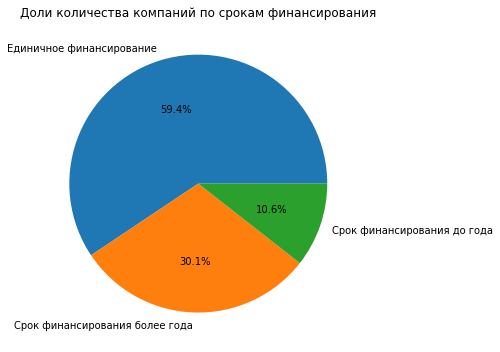

In [65]:
count_group_procent.plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', 
                         title='Доли количества компаний по срокам финансирования', ylabel='')
plt.tight_layout()
plt.show()


Компаний, в которые профинансировали 1 раз большинство - 59.4% или 24285. 
В которые финансируют больше года - 30.1% или 12290. 
В которые профинансировали до 1 года - 10.6% или 4324. 


____________________________________________________________________________________________________________

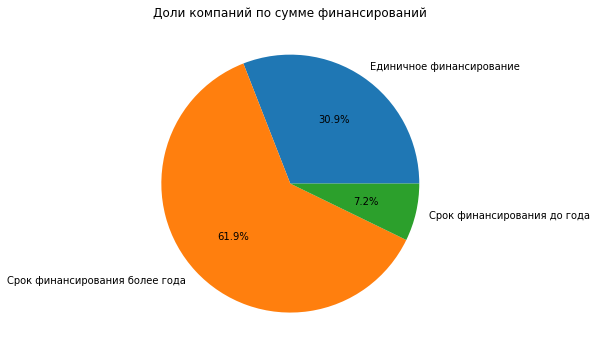

In [66]:
count_usd_procent.plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%',
                         title='Доли компаний по сумме финансирований', ylabel='')
plt.tight_layout()
plt.show()

В компании, которые финансируются более года выделяют больше всего денежных средств - 61.9%. 
В компании который финансируются до года выделяют меньше всего денег - 7.2%
В секторе единичного финансирования - 30.9% всех финаснсов.

___________________________________________________________________________________________________________________


В проекты, которые существуют больше года, финансируют большие суммы денег. Это связано с тем, что проекты "устаявшиеся", и в них виден большой потенциал, и масштабные проекты требуют значительных сумм для развития. На 30% таких проектов приходится 61.9% объема всех финансирований.

Единичное финасирование тоже занимает большой процент финансирования - 30.9% от всех фсумм финансирвоания, но тут доля проектов по числу очень большая 59,4% или 24285 проектов. Что говорит нам, об огромном рынке стартапов. Высокий риск, следоовательно низкий средний чек финансирвоания.

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

In [67]:
count_market = df['market'].value_counts()

In [68]:
display(count_market.head(10))

software               4812
biotechnology          3590
mobile                 2343
e-commerce             1866
curated web            1693
enterprise software    1381
health care            1185
clean technology       1180
games                  1117
advertising            1107
Name: market, dtype: int64

In [69]:
display((count_market / count_market.sum() * 100).round(2).head(10))

software               12.53
biotechnology           9.35
mobile                  6.10
e-commerce              4.86
curated web             4.41
enterprise software     3.60
health care             3.09
clean technology        3.07
games                   2.91
advertising             2.88
Name: market, dtype: float64

Самые крупные категории рынка это `Software` с долей 12.53% и `Biotechnology` с долей 9.35%|

In [70]:
def segments(counts):
    if counts > 120:
        return 'Массовый'
    elif 35 <= counts <= 120:
        return 'Средний'
    elif counts < 35:
        return 'Нишевый'

In [71]:
market_segment = count_market.apply(segments)

In [72]:
niche_counts = count_market[count_market < 35]
massive_counts = count_market[count_market > 120]

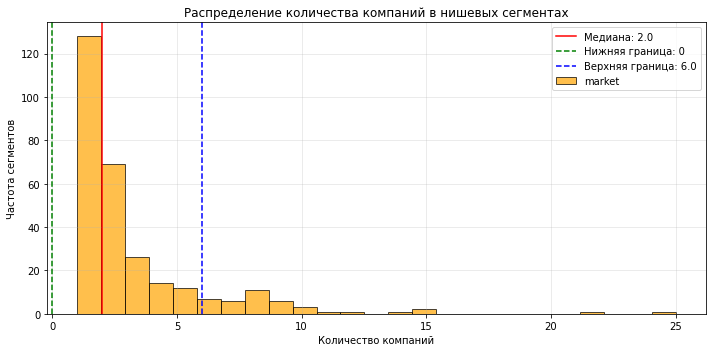

In [73]:
q1 = niche_counts.quantile(0.25)
q3 = niche_counts.quantile(0.75)
iqr = q3 - q1
    
lower_line = q1 - 1.5 * iqr
upper_line = q3 + 1.5 * iqr

if lower_line <0:
    lower_line = 0
# Гистограмма : нишевые
plt.figure(figsize=(10, 5))
niche_counts.plot(kind='hist', bins=25, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(x=niche_counts.median(), color='red', linestyle='-', label=f'Медиана: {niche_counts.median():.1f}')
plt.axvline(x=lower_line, color='green', linestyle='--', label=f'Нижняя граница: {lower_line}')
plt.axvline(x=upper_line, color='blue', linestyle='--', label=f'Верхняя граница: {upper_line}')
plt.title('Распределение количества компаний в нишевых сегментах')
plt.xlabel('Количество компаний')
plt.ylabel('Частота сегментов')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- В нишевых сегментах чаще всего одна компания. Нишевые сегменты - единичные, уникальные проекты.
- Все что выше 6 компаний для нишевого сегмента - аномалия, выброс.
- Нишевые сегменты от 20 до 35 компаний - сильные сегменты, близкие к средним.

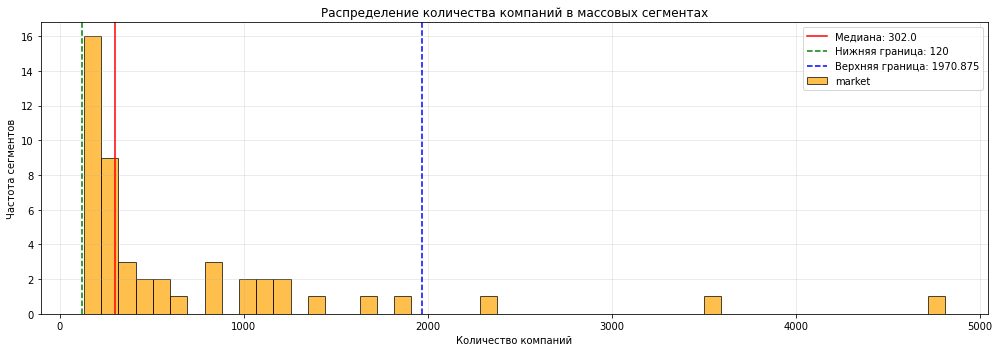

In [74]:
q1 = massive_counts.quantile(0.25)
q3 = massive_counts.quantile(0.75)
iqr = q3 - q1
    
lower_line = q1 - 1.5 * iqr
upper_line = q3 + 1.5 * iqr

if lower_line < 120:
    lower_line = 120
# Гистограмма : массовые
plt.figure(figsize=(14, 5))
massive_counts.plot(kind='hist', bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(x=massive_counts.median(), color='red', linestyle='-', label=f'Медиана: {massive_counts.median():.1f}')
plt.axvline(x=lower_line, color='green', linestyle='--', label=f'Нижняя граница: {lower_line}')
plt.axvline(x=upper_line, color='blue', linestyle='--', label=f'Верхняя граница: {upper_line}')
plt.title('Распределение количества компаний в массовых сегментах')
plt.xlabel('Количество компаний')
plt.ylabel('Частота сегментов')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

- 16 сегментов имееют 120-150 компаний. 
- Зрелый массовый рынок это 300+ компаний.
- Выше 1990 компаний - редкие огромные сегменты. 

In [75]:
segment_category = market_segment.value_counts()
display(segment_category)

Нишевый     289
Средний      57
Массовый     48
Name: market, dtype: int64

In [76]:
for market_name, count in count_market.items():
    if count < 35:
        df.loc[df['market'] == market_name, 'market'] = 'niche'
    elif count <= 120:
        df.loc[df['market'] == market_name, 'market'] = 'mid'

In [77]:
count_markets = df['market'].value_counts()
print(count_markets.head(10))

software               4812
mid                    3838
biotechnology          3590
mobile                 2343
e-commerce             1866
curated web            1693
enterprise software    1381
health care            1185
clean technology       1180
games                  1117
Name: market, dtype: int64


In [78]:
colors = []
for market in count_markets.index:
    if market == 'niche':
        colors.append('orange') 
    elif market == 'mid':
        colors.append('yellow')
    else:
        colors.append('skyblue')

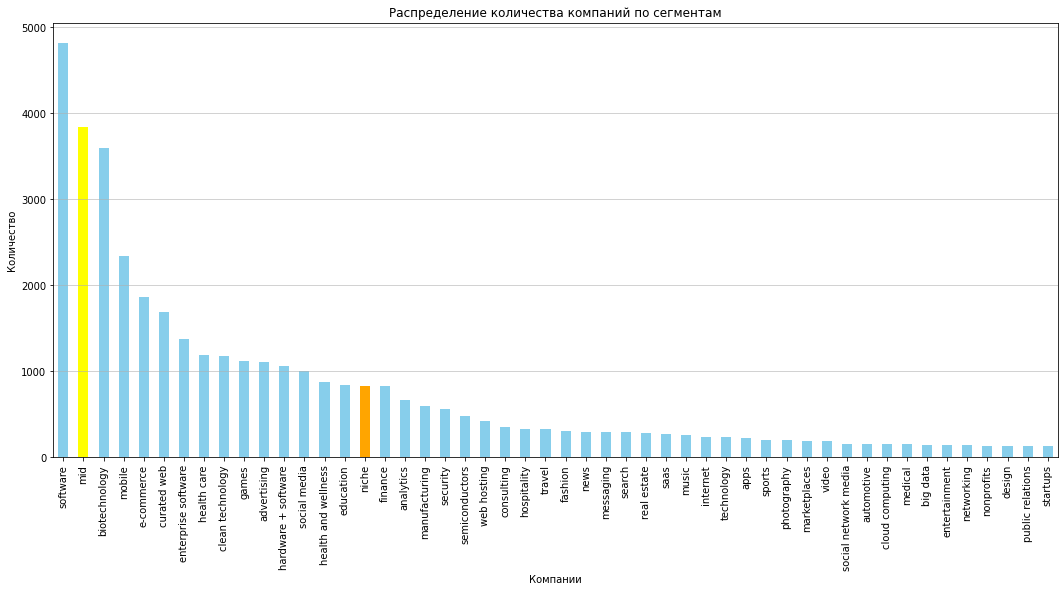

In [79]:
count_markets.plot(kind='bar', rot=90, figsize=(18, 8), color=colors)
plt.grid(axis='y', alpha=0.7)
plt.title('Распределение количества компаний по сегментам')
plt.xlabel('Компании')
plt.ylabel('Количество')
plt.show()

In [80]:
procent_market = (count_markets / count_markets.sum() * 100).round(2)

In [81]:
display(procent_market.head(10))
display(procent_market.tail(10))

software               12.53
mid                    10.00
biotechnology           9.35
mobile                  6.10
e-commerce              4.86
curated web             4.41
enterprise software     3.60
health care             3.09
clean technology        3.07
games                   2.91
Name: market, dtype: float64

automotive          0.40
cloud computing     0.40
medical             0.39
big data            0.39
entertainment       0.39
networking          0.37
nonprofits          0.35
design              0.35
public relations    0.35
startups            0.34
Name: market, dtype: float64

Програмное обеспечение имеет самую большую долю на рынке инвестирования - 12.53%, самы привлекательный сегмент для инвестирования.

Группа из средненишевые категории занимают 10%. 

software, biotech и mobile занимают примерно 28%, концентрация инвестирвоания на эти крупные сегменты. 

Много ниш ниже 1%. Высокий риск инвестирования.

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

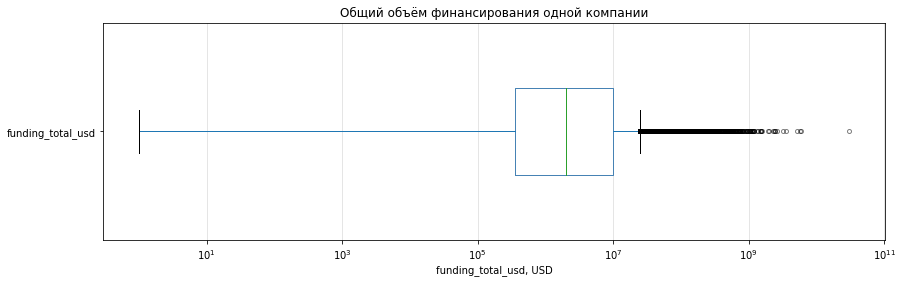

In [82]:
import numpy as np

df['funding_total_usd'].plot(kind='box', vert=False, 
    boxprops=dict(color='steelblue'),
    flierprops=dict(marker='o', markersize=4, alpha=0.5),
    widths=0.4, figsize=(14, 4))
plt.title('Общий объём финансирования одной компании')
plt.xlabel('funding_total_usd, USD')
plt.ylabel('')
plt.grid(axis='x', alpha=0.4)
plt.xscale('log')
plt.show()

In [83]:
df['funding_total_usd'].describe()

count    4.089900e+04
mean     1.591451e+07
std      1.686952e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

Типичная компания привлекает от 350 000 долларов до 10млн долларов.
Среднее значение 15.9млн долларов сильно искажено большими сделками.
Распределение асимметрично - большинство компаний имеют малые финансирвоания, но есть сверхкрупные сделки(выбросы).

In [84]:
groups = df.groupby('market')

results = []

for segment_name, group_data in groups:
    money = group_data['funding_total_usd']
    
    q1 = money.quantile(0.25)
    q3 = money.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    anomalies = money > upper_bound
    anomaly_count = anomalies.sum()
    total_count = len(money)
    anomaly_share = anomaly_count / total_count * 100
    
    results.append({
        'cегмент': segment_name,
        'аномалий': anomaly_count,
        'всего': total_count,
        'Доля аномалий (%)': round(anomaly_share, 2)
    })

result_table = pd.DataFrame(results)

result_table = result_table.sort_values('Доля аномалий (%)', ascending=False)

In [85]:
print("ТОП сегментов с наибольшей долей аномального финансирования:")
display(result_table.head(10))

ТОП сегментов с наибольшей долей аномального финансирования:


,cегмент,аномалий,всего,Доля аномалий (%)
36,real estate,48,279,17.20
14,entertainment,25,150,16.67
8,consulting,58,349,16.62
38,search,48,291,16.49
7,cloud computing,25,152,16.45
37,saas,44,272,16.18
34,photography,33,204,16.18
46,technology,38,238,15.97
48,video,30,188,15.96
32,niche,132,830,15.90


In [86]:
display(result_table.tail(10))

,cегмент,аномалий,всего,Доля аномалий (%)
18,hardware + software,123,1062,11.58
10,design,15,135,11.11
20,health care,128,1185,10.80
5,biotechnology,382,3590,10.64
23,manufacturing,63,596,10.57
13,enterprise software,146,1381,10.57
17,games,117,1117,10.47
49,web hosting,43,424,10.14
33,nonprofits,13,135,9.63
40,semiconductors,34,484,7.02


Сегмент real estate имеет самую большую долю аномалий. Меньшая доля у semiconductors - 7.02%.

3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

In [87]:
#сравнение количество раундов
rounds_by_year = df.groupby(df['mid_funding_at'].dt.year)['funding_rounds'].sum()
print("Раунды по годам:", rounds_by_year)

df_no_anomalies = df.copy()
for segment_name, group_data in df.groupby('market'):
    money = group_data['funding_total_usd']
    q1 = money.quantile(0.25)
    q3 = money.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    anomalies = df_no_anomalies['funding_total_usd'] > upper_bound
    df_no_anomalies = df_no_anomalies[anomalies]

print(f"Удалено аномалий: {len(df) - len(df_no_anomalies)}")

# Фильтр > 50 раундов
years_filt_rounds = rounds_by_year[rounds_by_year >= 50].index
df_filtered = df_no_anomalies[df_no_anomalies['mid_funding_at'].dt.year.isin(years_filt_rounds)]
print(f"Осталось строк после фильтра: {len(df_filtered)}")

df = df_filtered

Раунды по годам: mid_funding_at
1921        1.0
1960        1.0
1979        1.0
1982        3.0
1983        3.0
1984        1.0
1985        3.0
1987        2.0
1989        1.0
1990        1.0
1992        3.0
1993        3.0
1994        4.0
1995        3.0
1996        5.0
1997       16.0
1998       28.0
1999       59.0
2000      146.0
2001      117.0
2002      115.0
2003      156.0
2004      302.0
2005     1115.0
2006     2052.0
2007     2988.0
2008     4197.0
2009     6251.0
2010     8751.0
2011    10725.0
2012    13936.0
2013    14519.0
2014     9065.0
Name: funding_rounds, dtype: float32
Удалено аномалий: 39356
Осталось строк после фильтра: 1542


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 0 to 49412
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  1542 non-null   object        
 1   homepage_url          1501 non-null   object        
 2   category_list         1494 non-null   object        
 3   market                1494 non-null   object        
 4   funding_total_usd     1542 non-null   float32       
 5   status                1501 non-null   object        
 6   country_code          1484 non-null   object        
 7   state_code            1124 non-null   object        
 8   region                1484 non-null   object        
 9   city                  1461 non-null   object        
 10  funding_rounds        1542 non-null   float32       
 11  participants          1542 non-null   float16       
 12  founded_at            1296 non-null   datetime64[ns]
 13  founded_month    

- Данные лучше считать от 2000 года, где раундов финансирвоания больше 100. 
- Каждый код раунды финансирвоания увеличивались, но в 2014 резко упали -37%. Возможно данные не полные.

### 3.3. Анализ типов финансирования по объёму и популярности


In [89]:
finance = df[['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
             'convertible_note', 'debt_financing', 'angel', 'grant', 
             'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market',
             'product_crowdfunding']].sum()

In [90]:
finance_millons = finance / 1000000

In [91]:
finance_sort = finance_millons.sort_values(ascending=True)

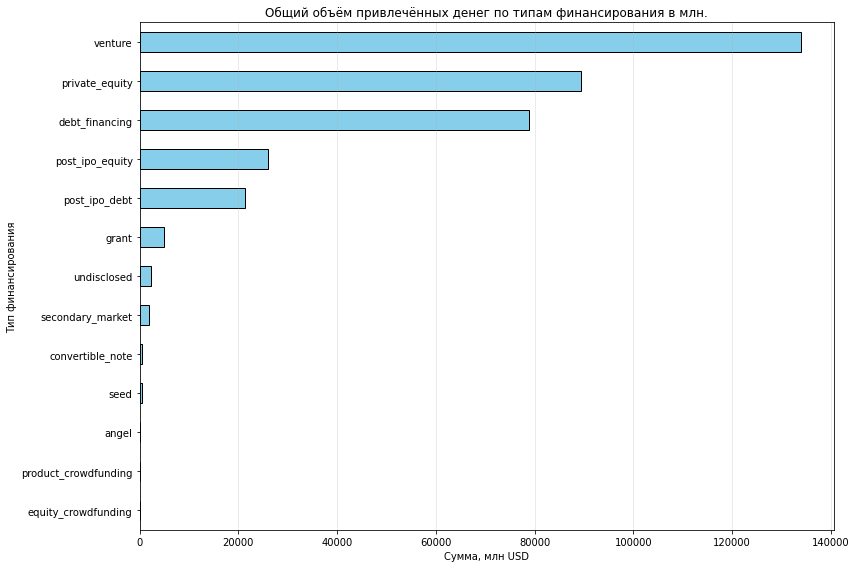

In [92]:
finance_sort.plot(kind='barh', color='skyblue', edgecolor='black', figsize=(12, 8))

plt.title('Общий объём привлечённых денег по типам финансирования в млн.')
plt.xlabel('Сумма, млн USD')
plt.ylabel('Тип финансирования')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Больше всего привлекло средст венчурное финансирвоание > 135 000 млн долларов.

`private_equity` около 90 000 млн долларов.

`equity_crowdfunding`, `angel`, `product_crowdfunding` имют меньше всего финансирования.

In [93]:
popular_finance = (df[['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
             'convertible_note', 'debt_financing', 'angel', 'grant', 
             'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market',
             'product_crowdfunding']] > 0).sum()

In [94]:
popular_finance_sort = popular_finance.sort_values(ascending=True)

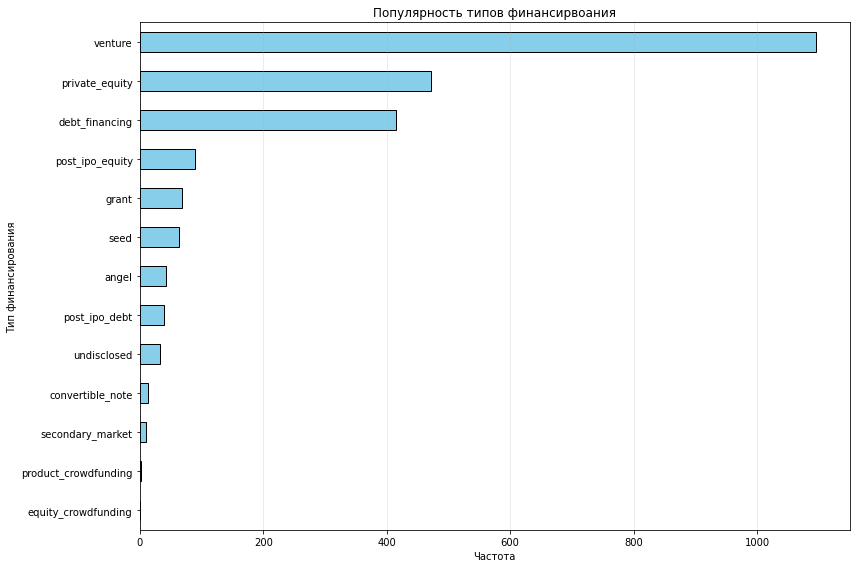

In [95]:
popular_finance_sort.plot(kind='barh', color='skyblue', edgecolor='black', figsize=(12, 8))

plt.title('Популярность типов финансирвоания')
plt.xlabel('Частота')
plt.ylabel('Тип финансирования')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

`Венчурное финансирование` популярнее остальных типов привличения >1100 проектов поспользовались данным типпом.

`private_equity` > 400 проектов.

`debt_financing` в 400 проектов привлекли почти 80 000 млн USD.

____________________________________________________________________________________________________________________

In [96]:
f_tipes = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
    'convertible_note', 'debt_financing', 'angel', 'grant',
    'private_equity', 'post_ipo_equity', 'post_ipo_debt',
    'secondary_market', 'product_crowdfunding']

In [97]:
finance_return = df_2[f_tipes].sum()

In [98]:
finance_return_sort = finance_return.sort_values(ascending=True)

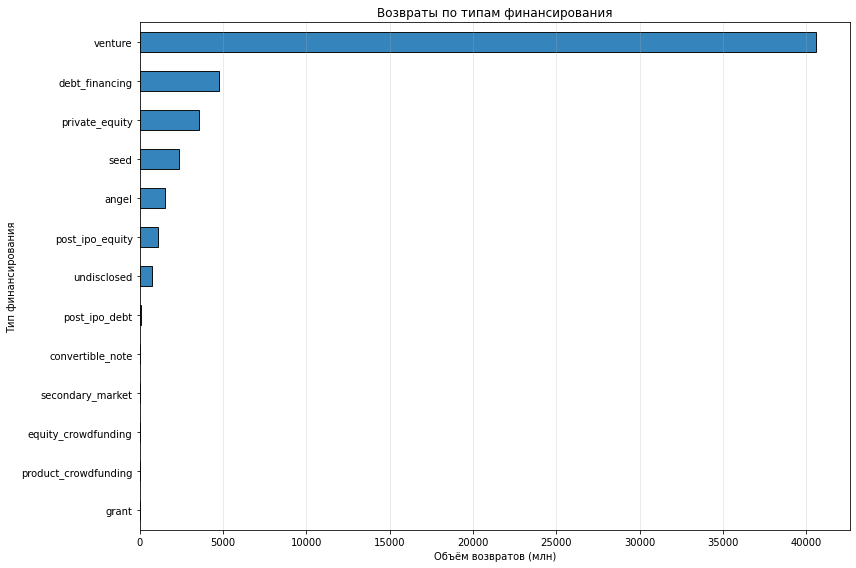

In [99]:
finance_return_sort.plot(kind='barh', edgecolor='black', alpha=0.9, figsize=(12, 8)
)
plt.title('Возвраты по типам финансирования')
plt.xlabel('Объём возвратов (млн)')
plt.ylabel('Тип финансирования')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Венчерное инвестирование лидер по возвратам средств > 40000 млн долларов. 

4900 млн вернул сегмент `debt_finance`. 

`private_equity`, `seed`, `angel` тоже дают значаительный возврат от 2500 до 4000 млн USD, но заметно позади лидеров.

Меньше всего возвратов от `grant`, `product_crowdfunding`, `secondary_market`, `equity_crowdfunding`, `convertible_note`.

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам



In [100]:
df['avg_round_usd'] = df['funding_total_usd'] / df['funding_rounds']

df['funding_year'] = df['mid_funding_at'].dt.year

display(df[['name', 'funding_total_usd', 'funding_rounds', 'avg_round_usd', 'funding_year']].head())

/tmp/ipykernel_207/2414847791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_round_usd'] = df['funding_total_usd'] / df['funding_rounds']
/tmp/ipykernel_207/2414847791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['funding_year'] = df['mid_funding_at'].dt.year


,name,funding_total_usd,funding_rounds,avg_round_usd,funding_year
0,harvard university,90000000.0,1.0,90000000.0,2014
17,university of maryland,750499968.0,2.0,375249984.0,2013
20,great atlantic & pacific tea,175000000.0,1.0,175000000.0,2009
23,massachusetts institute of technology - mit,90000000.0,1.0,90000000.0,2014
32,commerce bank,150000000.0,1.0,150000000.0,2014


In [101]:
#средний объем раунда
typical_rounds = df.groupby('funding_year')['avg_round_usd'].median() / 1000000

#общее количество раундов по годам
total_rounds = df.groupby('funding_year')['funding_rounds'].sum()

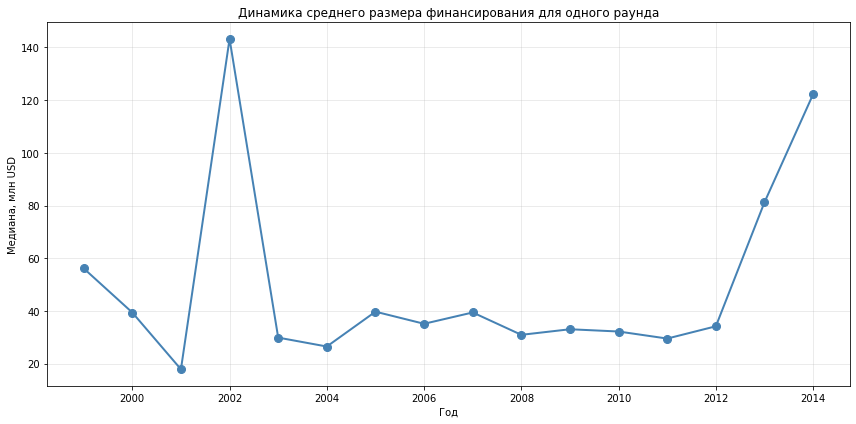

In [102]:
#средний размер раунда
typical_rounds.plot(kind='line', marker='o', figsize=(12, 6),
    color='steelblue', linewidth=2, markersize=8)
plt.title('Динамика среднего размера финансирования для одного раунда')
plt.xlabel('Год')
plt.ylabel('Медиана, млн USD')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

- с 2003 по 2012 среднее финансирование не превышало 40 млн USD.
- с 2013 начался бурный рост 80 млн USD в 2013 и 120 млн USD в 2014.
- Необычный всплееск финансирования в 2002.

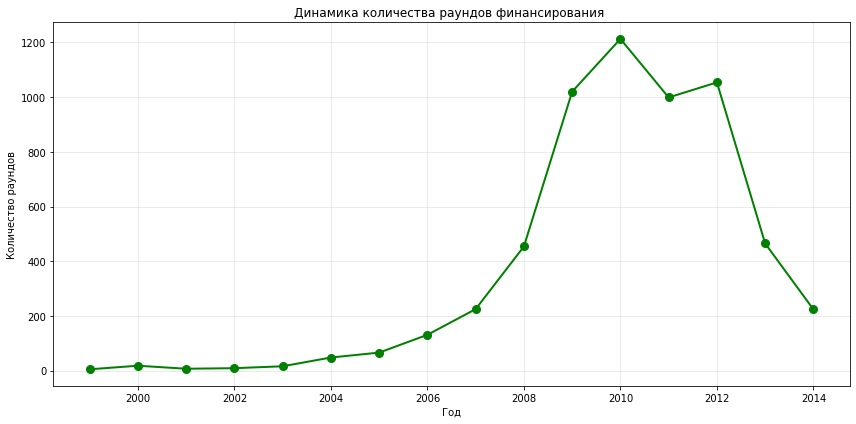

In [103]:
#Динамика количества раундов
total_rounds.plot(kind='line', marker='o', figsize=(12, 6), color='green', linewidth=2, markersize=8)
plt.title('Динамика количества раундов финансирования ')
plt.xlabel('Год')
plt.ylabel('Количество раундов')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Количество раундов финансирвоания с 2002 по 2010 показывало кратный рост.
- 2010 пик 1200 раундов, 2011 снижение до 1000, 2012 небольшой отскок до 1050. В 2013 резкое уменьшение до ~450 раундов.

In [104]:
max_year = typical_rounds.idxmax()
max_value = typical_rounds.max()

print(f"В каком году размер 1 раунда был максимальным?")
print(f" {max_year} год {max_value} млн долларов")

rounds_growth = ((total_rounds[2014] - total_rounds[2013]) / total_rounds[2013] * 100).round(1)
size_change = ((typical_rounds[2014] - typical_rounds[2013]) / typical_rounds[2013] * 100).round(1)
    
print(f"- Количество раундов: {rounds_growth}% в 2014 году по отношению к 2013")
print(f"- Средний размер раунда: +{size_change}% в 2014 году по отношению к 2013")

В каком году размер 1 раунда был максимальным?
 2002 год 143.25 млн долларов
- Количество раундов: -51.8% в 2014 году по отношению к 2013
- Средний размер раунда: +50.5% в 2014 году по отношению к 2013


### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [105]:
table = df.groupby(['funding_year', 'market'])['funding_total_usd'].sum().unstack(fill_value=0)
table = (table / 1000000).round(2)
print("Сводная таблица (млн $):")
display(table)

Сводная таблица (млн $):


market,advertising,analytics,automotive,big data,biotechnology,clean technology,cloud computing,consulting,curated web,design,...,security,semiconductors,social media,social network media,software,sports,technology,travel,video,web hosting
funding_year,,,,,,,,,,,,,,,,,,,,,
1999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,91.00,0.00,0.00,0.00,0.00,0.00
2000,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,186.00,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2003,84.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,118.30,0.00,0.00,0.00,0.00,0.00
2004,273.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,141.54,0.00,0.00,0.0,214.21,0.00,0.00,0.00,0.00,221.00
2005,0.00,0.00,0.00,0.00,81.57,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,185.00,0.00,0.00,0.00,0.00,312.00
2006,140.50,0.00,0.00,0.00,896.60,0.00,91.25,0.00,189.83,0.00,...,0.00,82.00,0.00,0.0,540.85,0.00,0.00,100.00,0.00,210.00
2007,585.04,91.00,0.00,92.90,634.55,1038.50,81.00,0.00,405.30,0.00,...,0.00,552.51,2425.70,0.0,999.29,0.00,982.68,116.40,0.00,166.60


In [106]:
massive = table.drop(columns=['mid', 'niche'], errors='ignore')
print("Только массовые сегменты:")
display(massive)

Только массовые сегменты:


market,advertising,analytics,automotive,big data,biotechnology,clean technology,cloud computing,consulting,curated web,design,...,security,semiconductors,social media,social network media,software,sports,technology,travel,video,web hosting
funding_year,,,,,,,,,,,,,,,,,,,,,
1999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,91.00,0.00,0.00,0.00,0.00,0.00
2000,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,186.00,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2003,84.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,118.30,0.00,0.00,0.00,0.00,0.00
2004,273.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,141.54,0.00,0.00,0.0,214.21,0.00,0.00,0.00,0.00,221.00
2005,0.00,0.00,0.00,0.00,81.57,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,185.00,0.00,0.00,0.00,0.00,312.00
2006,140.50,0.00,0.00,0.00,896.60,0.00,91.25,0.00,189.83,0.00,...,0.00,82.00,0.00,0.0,540.85,0.00,0.00,100.00,0.00,210.00
2007,585.04,91.00,0.00,92.90,634.55,1038.50,81.00,0.00,405.30,0.00,...,0.00,552.51,2425.70,0.0,999.29,0.00,982.68,116.40,0.00,166.60


In [107]:
if 2013 in massive.index and 2014 in massive.index:
    growing = massive.loc[2014] > massive.loc[2013]
    growing_names = growing[growing].index.tolist()
    data_for_plot = massive[growing_names]
    print("Сегменты, выросшие в 2014:")
    print(growing_names)

Сегменты, выросшие в 2014:
['consulting', 'design', 'enterprise software', 'entertainment', 'finance', 'health care', 'hospitality', 'manufacturing', 'medical', 'news', 'nonprofits', 'real estate', 'software', 'sports', 'video']


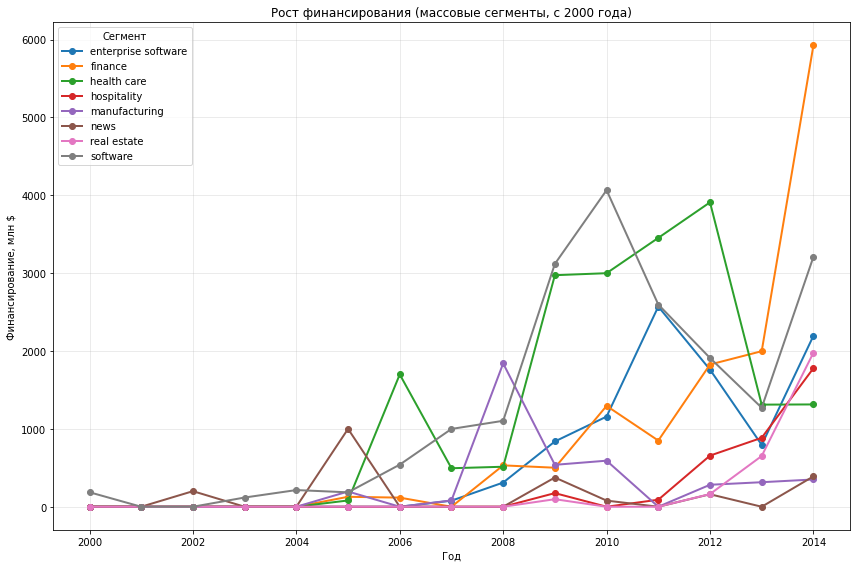

In [108]:
data_from_2000 = data_for_plot[data_for_plot.index >= 2000]

total_sum_segment = data_from_2000.sum()

big_segments = total_sum_segment[total_sum_segment > 2000].index #отфильтровал до 2 млр за период 2000-2014
data_filtered = data_from_2000[big_segments]

plt.figure(figsize=(12, 8))

for col in data_filtered.columns:
    plt.plot(data_filtered.index, data_filtered[col], 
             marker='o', label=col, linewidth=2)

plt.title('Рост финансирования (массовые сегменты, с 2000 года)')
plt.xlabel('Год')
plt.ylabel('Финансирование, млн $')

plt.legend(title='Сегмент')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

- С 2000 по 2014 год венчурный рынок взлетел - общий объём инвестиций вырос в десятки раз.

- Лидеры роста - `software`, `finance` и `health care`.

- Пик `finance` в 2014 - 6000 млн USD.

- `finance` лидер с 2013 года.

- `software` пик в 2010 - 4000 млн USD.

- `health care` показал высокий рост с 2008 по 2012. Резкое падение в 2013.

- 2013-2014 в топ 5 вошли: `software`, `finance`, `real estate`, 'enterprise software', `hospitality`.


### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

In [109]:
df_analysis = df.copy()

In [110]:
df_analysis['funding_year'] = df_analysis['mid_funding_at'].dt.year

In [111]:
types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

In [112]:
invested_by_year = df_analysis.groupby('funding_year')[types].sum() / 1000000

In [113]:
common_years = invested_by_year.index.intersection(df_2.index)

In [114]:
invested_filtered = invested_by_year.loc[common_years]
returns_filtered = df_2.loc[common_years, types]

In [115]:
return_share = returns_filtered / (invested_filtered + 1e-10)

In [116]:
return_share_clean = return_share.copy()
for col in return_share_clean.columns:
    return_share_clean.loc[return_share_clean[col] > 10, col] = None

In [117]:
print(f"\nДоля возвратов после обработки выбросов:")
display(return_share_clean)


Доля возвратов после обработки выбросов:


,venture,debt_financing,private_equity,seed,angel
2000,0.106641,0.192444,0.000000,NaN,NaN
2001,NaN,NaN,0.000000,NaN,NaN
2002,1.774746,0.017100,0.001184,NaN,0.682000
2003,0.590556,0.054500,0.005400,NaN,NaN
2004,0.779075,4.081102,0.005448,NaN,NaN
2005,2.262477,0.140839,0.002904,4.666667,NaN
2006,1.178741,0.063714,0.010094,NaN,NaN
2007,0.619200,0.145312,0.016414,4.332923,NaN
2008,0.253834,0.216918,0.030322,8.972000,NaN
2009,0.111008,0.107460,0.025783,0.682980,NaN


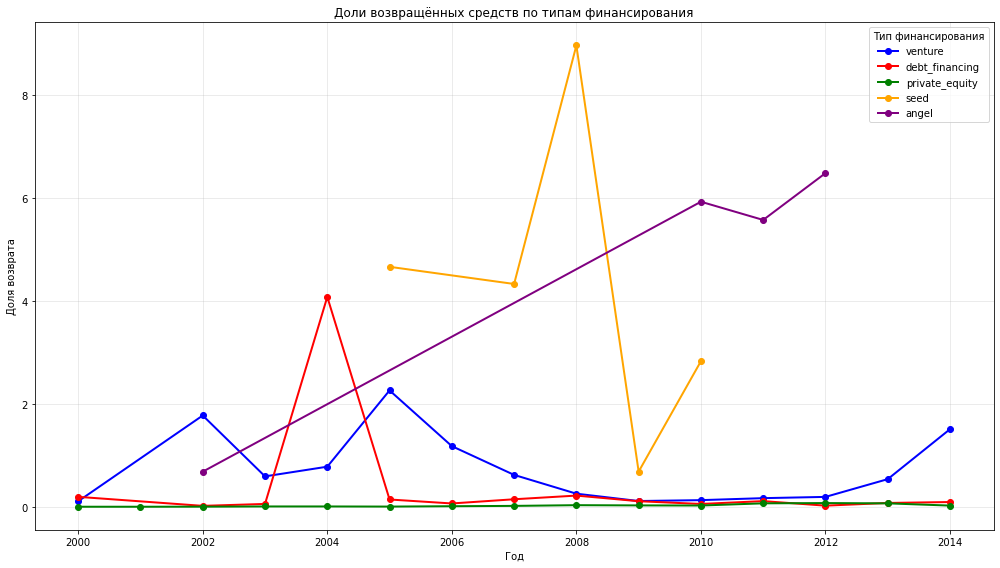

In [118]:
plt.figure(figsize=(14, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, col in enumerate(return_share_clean.columns):
    valid_data = return_share_clean[col].dropna()
    if not valid_data.empty:
        plt.plot(valid_data.index, valid_data.values, 
                marker='o', label=col, linewidth=2, markersize=6, color=colors[i])

plt.title('Доли возвращённых средств по типам финансирования')
plt.xlabel('Год')
plt.ylabel('Доля возврата')
plt.legend(title='Тип финансирования')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Доля возвращенных средств в `venture` не превышает 25%.

`angel` начиная с 2004го года показывают хорошие результаты возврата средств от 20% до 63%.

`seed` имеют хорошие показатели с 2005 по 2008 от 48% до 84% вовзрата, но в 2009 упали % возвратов упали до 9%.

`private_equity` имееют очень маленькие % возвратов 1-2%.

___________________________________________________________________________________________________________


## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.



**Рекомендации для инвестиционной компании (2015 год)**

На основе анализа данных о финансировании за период 2000-2014 годов, предлагаю рекомендации:

**1. Сегменты:**

Software - лидер рынка с 12.53% долей, демонстрирующий устойчивый рост с 2004 года. В 2014 году сегмент показал рекордные 6000 млн USD финансирования.

Дополнительно:

Biotechnology (9.35% рынка) - стабильно высокие объемы инвестиций

Finance - самый быстрорастущий сегмент в 2013-2014 годах

Mobile (6.1% рынка) - технологически перспективное направление

**2. Типы финансирования:**

Основной инструмент: Venture financing - лидер по объему привлеченных средств (>135,000 млн USD) и возвратам (>40,000 млн USD). Сочетает массовость (используется в 1100+ компаниях) и стабильную долю возвратов (до 25%).

Дополнительные инструменты:

Angel investments - демонстрируют высокую долю возвратов (до 60-80% в отдельные годы)

**3. Сроки:**

Сосредоточить большую часть портфеля на компаниях со сроком финансирования более года - они получают 61.9% общего объема инвестиций при доле в 30% от общего числа компаний

Рассмотреть возможности в единичном финансировании для диверсификации рисков

**Анализ:**

Загрузка и предобработка данных (49432 записи после очистки)

Инжиниринг признаков: классификация по срокам финансирования и сегментам рынка

Выявление и обработка выбросов методом IQR

Анализ динамики финансирования по годам и сегментам

Оценка эффективности различных типов финансирования через анализ возвратов

**Выводы:**

Рост рынка: 2014 год стал рекордным по среднему размеру раунда (120 млн USD), несмотря на снижение количества раундов на 37%

Концентрация инвестиций: 28% рынка контролируют три сегмента - Software, Biotechnology и Mobile

Эффективность финансирования: Venture демонстрирует лучший баланс между объемом инвестиций и возвратами

География роста: Сегменты Software и Finance показали наибольший рост в 2014 году

Согласованность выводов:
Все проведенные анализы указывают на перспективность инвестиций в технологический сектор (Software) через венчурное финансирование. Данные по объемам инвестиций, динамике роста и возвратам согласуются между собой.

Области для дополнительного исследования:

Причины резкого снижения количества раундов финансирования в 2014 

Факторы, влияющие на высокую волатильность возвратов по типам финансирования


Рынок стартапов демонстрирует устойчивый рост с концентрацией на технологических сегментах. Рекомендуемая стратегия - фокус на Software с использованием venture financing при диверсификации через angel investments и private equity для балансировки рисков и доходности.